<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Load_and_Preprocess_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np 
import os
import PIL
import PIL.Image
import tensorflow as tf 
import tensorflow_datasets as tfds

In [21]:
import pathlib
from pathlib import Path

flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=flowers_url,fname="flower_photos")
data_dir = Path(data_dir)

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count) 
#Total of 3 thousand six hundred and seventy images downloaded

3670


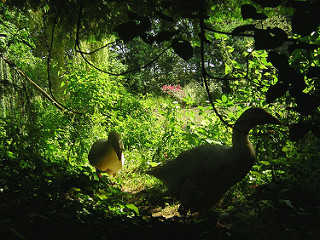

In [26]:
roses = list(data_dir.glob('roses/*'))


PIL.Image.open(str(roses[1]))

In [28]:
#Define the dataset parameters
image_height =180
image_width = 180
image_batch = 32

In [32]:
#Load the image off disk using keras utility
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset="training",
    seed = 123,
    validation_split = 0.2,
    image_size = (image_width,image_height),
    batch_size =image_batch
    )

#Load the validation data
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset = "validation",
    seed = 123,
    validation_split=0.2,
    image_size = (image_width,image_height),
    batch_size = image_batch
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [35]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


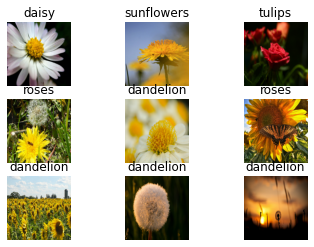

In [47]:
#Visualize the data to check whether the data is labeled correctly
for image,labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [49]:
#Lets manually iterate over the dataset and retrieve the batch images
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


RGB channel(3) this means that the image has 3 channels, so we have to standardize or normalize the data before we pass them to our neural network. Normalization means turning the values to be floating point numbers in between zero and one [0,1] 

In [52]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))

In [58]:
for image,label in normalized_ds.take(1):
  print(np.max(image))
  print(np.min(image))
  #print(image)

1.0
0.0
